# LIME Explanations of in-vivo Gastral Images

## Imports

We

In [4]:
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import numpy as np
import lime
from lime import lime_image




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## Constants

In [92]:
example_image_path_bleeding = '/Users/timotheuskampik/Downloads/training/validation/bleeding/Set1_836.png'
example_image_path_non_bleeding = '/Users/timotheuskampik/Downloads/training/validation/nonbleeding/Set1_91.png'

## Loading the Model

In [93]:
explainer = lime_image.LimeImageExplainer()

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
   model = keras.models.load_model('model_full.h5')

In [124]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


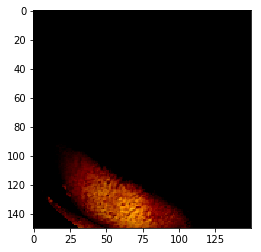

In [135]:
images = transform_img_fn([(example_image_path_bleeding), example_image_path_non_bleeding])
images_new = [image / 2 + 0.5 for image in images]
plt.imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


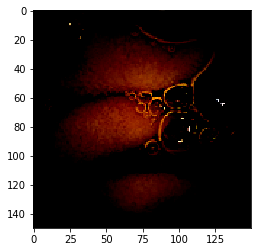

In [136]:
plt.imshow(images[1])

In [137]:
explanation = explainer.explain_instance(images[0], model.predict)

In [138]:
model.predict(images)

array([[0.],
       [0.]], dtype=float32)

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
